In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [120]:
df=pd.read_csv('kas.csv')
df

,title,summary,url,approval_date_iso8601,stream_name,approved_by_name,clicks_fb,shares_fb,click_rate_fb,engagement_rate_fb,...,engagements_total,click_rate_avg,engagement_rate_avg,shares_total,sharer_count,group_id,group_count,enterprise_group_id,sharing_rate,Article Tags
0,"Друзья, поздравляем вас с Новым Годом! https:/...","Друзья, поздравляем вас с Новым Годом! https:/...",https://twitter.com/Kaspersky_ru/status/121226...,2020-01-01T08:52:48Z,RU - Company Stream,NaN,0,1,0.0,0.0,...,0.0,1.3,0.0,10.0,6.0,134619.0,123.0,134619.0,0.0488,NaN
1,Social Media Detox: 5 Gründe für eine Pause vo...,Social Media kann sich ernsthaft auf die menta...,https://www.elle.de/social-media-detox,2020-01-02T07:45:09Z,DE - Company Stream,Michael Roesner,0,0,0.0,0.0,...,1.0,0.8,0.3,4.0,2.0,135166.0,53.0,135166.0,0.0377,NaN
2,Ältere mit Technik-Geschenken oft überfordert,Weihnachten ist vorbei und bestimmt gab es wie...,https://www.verivox.de/nachrichten/aeltere-mit...,2020-01-02T07:48:28Z,DE - Company Stream,Michael Roesner,0,0,0.0,0.0,...,1.0,1.5,0.5,2.0,1.0,135166.0,53.0,135166.0,0.0189,NaN
3,IT-Geräte in medizinischen Einrichtungen stehe...,2019 waren 19 Prozent aller Computer und Gerät...,https://www.aerzteblatt.de/nachrichten/108264/...,2020-01-02T07:50:16Z,DE - Company Stream,Michael Roesner,0,0,0.0,0.0,...,1.0,1.5,0.5,2.0,1.0,135166.0,53.0,135166.0,0.0189,NaN
4,Vorsätze für 2020: Fast die Hälfte aller Deuts...,Viele starten ins neue Jahr mit guten Vorsätze...,https://www.kaspersky.de/blog/vorsatze-fur-202...,2020-01-02T12:53:20Z,DE - Company Stream,NaN,0,0,0.0,0.0,...,5.0,2.7,1.7,3.0,2.0,135166.0,53.0,135166.0,0.0377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Are your employees ready for remote work?,Did you have a chance to train your employees ...,https://kas.pr/6dw4,2020-04-17T10:51:55Z,EN - Our KL ambassadors,NaN,0,0,0.0,0.0,...,1.0,1.2,0.1,12.0,4.0,128483.0,401.0,128483.0,0.0100,NaN
3137,Готовы ли ваши сотрудники к удаленной работе?,Не успели обучить сотрудников основам инфобезо...,https://www.kaspersky.ru/blog/awareness-teleco...,2020-04-17T10:51:56Z,RU - B2B,NaN,0,3,0.0,0.0,...,2.0,0.9,0.1,27.0,8.0,128489.0,119.0,128489.0,0.0672,NaN
3138,Готовы ли ваши сотрудники к удаленной работе?,Не успели обучить сотрудников основам инфобезо...,https://www.kaspersky.ru/blog/awareness-teleco...,2020-04-17T10:51:56Z,RU - Company Stream,NaN,0,0,0.0,0.0,...,0.0,1.3,0.0,9.0,2.0,134619.0,123.0,134619.0,0.0163,NaN
3139,Готовы ли ваши сотрудники к удаленной работе?,Не успели обучить сотрудников основам инфобезо...,https://www.kaspersky.ru/blog/awareness-teleco...,2020-04-17T10:51:57Z,RU - B2C,NaN,0,1,0.0,0.0,...,0.0,0.9,0.0,21.0,5.0,128490.0,111.0,128490.0,0.0450,NaN


In [85]:
country_indexes = []
for i in range(len(df['stream_name'])):
    country_indexes.append(df['stream_name'][i].split()[0])
df["country index"] = country_indexes
countries = df['country index'].unique()
countries_sum = []
for i in range (len(countries)):
    countries_sum.append(df[df['country index']== countries[i]].count()[32])

In [86]:
countries_sum_upd = []
countries_upd = []
others_sum = 0
other_countries = []
for i in range(len(countries)):
    if countries_sum[i] > 75:
        countries_sum_upd.append(countries_sum[i])
        countries_upd.append(countries[i])
    else:
        others_sum += countries_sum[i]
        other_countries.append(countries[i])
countries_upd.append('OTHERS')
countries_sum_upd.append(others_sum)

In [87]:
other_countries

['IT', 'JP', 'IN', 'APAC', 'ESP', 'FR']

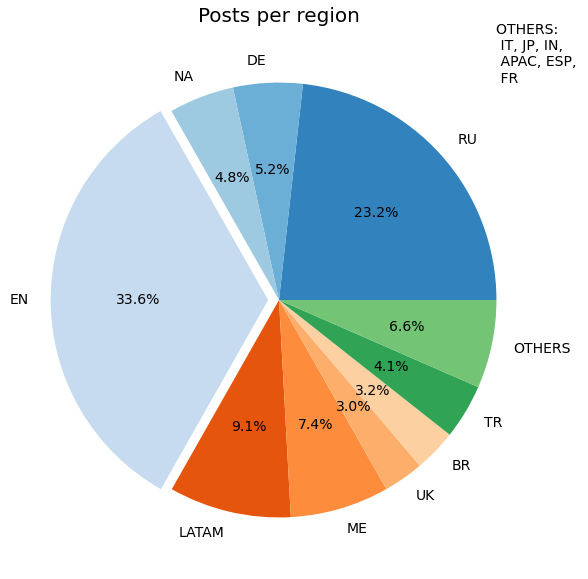

In [112]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(10)*1)
explode = (0, 0, 0, 0.05, 0,0 , 0, 0,0 ,0,)

plt.pie(countries_sum_upd, explode = explode, labels=countries_upd, autopct='%1.1f%%', textprops={'size': 14}, radius = 1, colors=outer_colors)
plt.text(1, 1, 'OTHERS: \n IT, JP, IN, \n APAC, ESP, \n FR', fontsize=14)
plt.title('Posts per region', fontsize=20)


plt.rcParams['figure.figsize'] = [20, 10]
plt.savefig('posts.png')

In [89]:
months = []
for i in range(len(df['approval_date_iso8601'])):
    months.append(dt.datetime.strptime(df['approval_date_iso8601'][i], "%Y-%m-%dT%H:%M:%SZ").month)
    if months[i] == 1: months[i] = 'Jan'
    if months[i] == 2: months[i] = 'Feb'
    if months[i] == 3: months[i] = 'Mar'
    if months[i] == 4: months[i] = 'Apr'
df['Month'] = months

month_sums = []
for i in range (len(months)):
    month_sums.append(df[df['Month']==months[i]].count()[32])

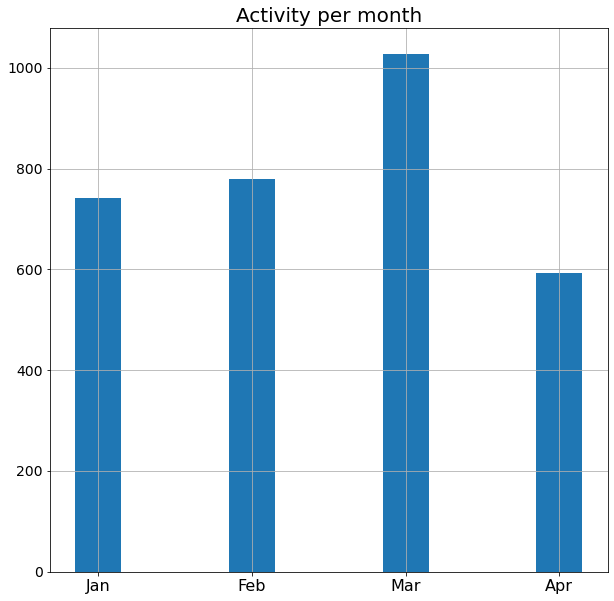

In [114]:
plt.bar(months, month_sums, width=0.3)
plt.title('Activity per month', fontsize = 20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 14)
plt.grid()
plt.savefig('activity_month.png')

In [91]:
weekdays = []
for i in range(len(df['approval_date_iso8601'])):
    weekdays.append(dt.datetime.strptime(df['approval_date_iso8601'][i], "%Y-%m-%dT%H:%M:%SZ").weekday())
    if weekdays[i] == 0: weekdays[i] = 'Mon'
    if weekdays[i] == 1: weekdays[i] = 'Tue'
    if weekdays[i] == 2: weekdays[i] = 'Wed'
    if weekdays[i] == 3: weekdays[i] = 'Thu'
    if weekdays[i] == 4: weekdays[i] = 'Fri'
    if weekdays[i] == 5: weekdays[i] = 'Sat'
    if weekdays[i] == 6: weekdays[i] = 'Sun'
df['Weekday'] = weekdays 

days_sorted = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
days_sums = []
for i in range (len(days_sorted)):
    days_sums.append(df[df['Weekday'] == days_sorted[i]].count()[32])

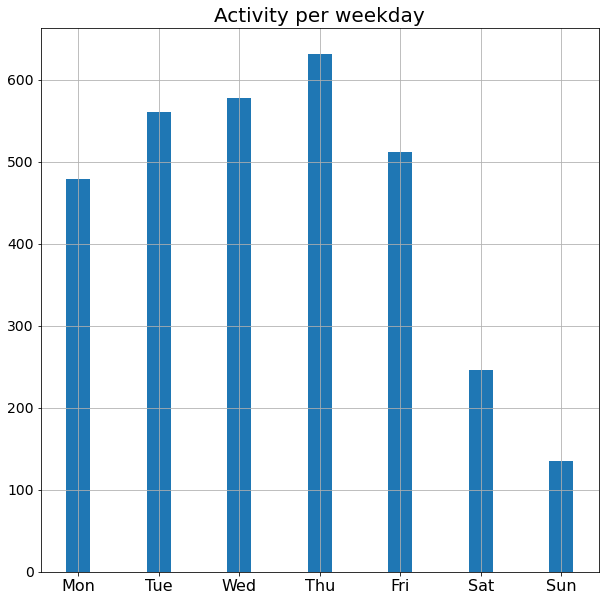

In [92]:
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(days_sorted, days_sums, width=0.3)
plt.title('Activity per weekday', fontsize = 20)
plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(labels, fontsize = 16)
plt.yticks(fontsize = 14)
plt.grid()
plt.savefig('activity_weekday.png')

In [93]:
hours = []
for i in range(len(df['approval_date_iso8601'])):
    hours.append(dt.datetime.strptime(df['approval_date_iso8601'][i], "%Y-%m-%dT%H:%M:%SZ").hour)
df['Hour'] = hours

hours_sorted = np.arange(24)
hours_sums = []
for i in range (len(hours_sorted)):
    hours_sums.append(df[df['Hour']==hours_sorted[i]].count()[32])

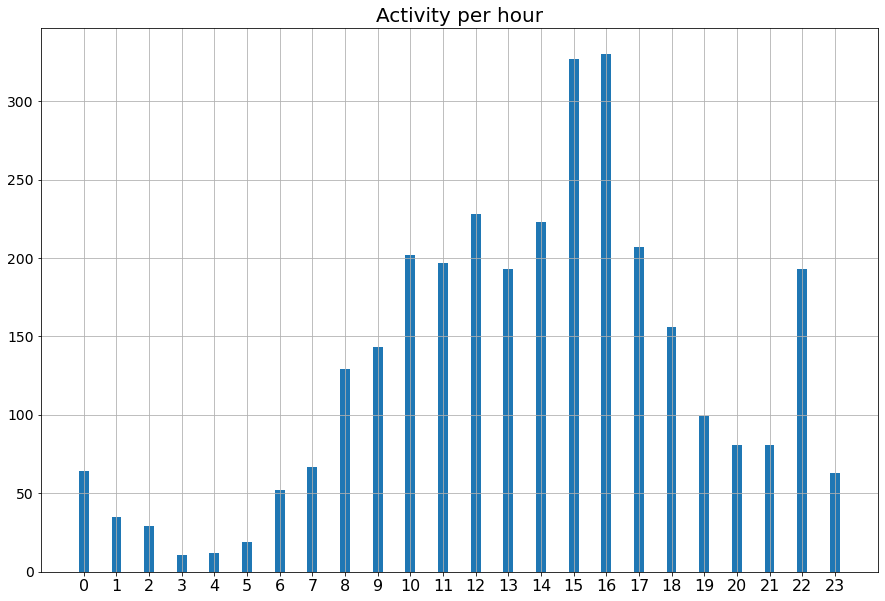

In [94]:
labels = np.arange(24)
plt.bar(hours_sorted, hours_sums, width=0.3)
plt.title('Activity per hour', fontsize = 20)
plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(labels, fontsize = 16)
plt.yticks(fontsize = 14)
plt.grid()
plt.savefig('activity_Hour.png')

In [95]:
df_rus_hours = df[df['country index']=='RU']
df_eng_hours = df[df['country index']=='EN']

In [96]:
hours_sorted = np.arange(24)
hours_sums_rus = []
for i in range (len(hours_sorted)):
    hours_sums_rus.append(df_rus_hours[df_rus_hours['Hour']==hours_sorted[i]].count()[32])    

In [97]:
hours_sorted = np.arange(24)
hours_sums_eng = []
for i in range (len(hours_sorted)):
    hours_sums_eng.append(df_eng_hours[df_eng_hours['Hour']==hours_sorted[i]].count()[32]) 

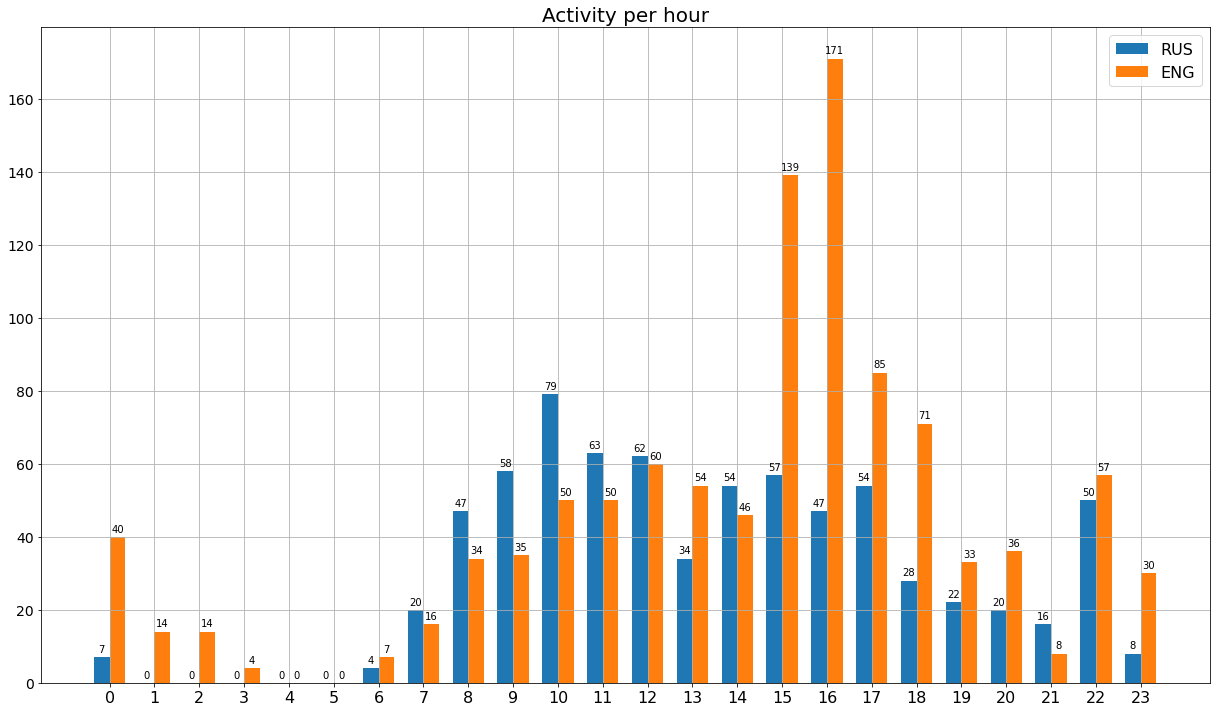

In [119]:
labels = np.arange(24)
x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hours_sums_rus, width, label='RUS')
rects2 = ax.bar(x + width/2, hours_sums_eng, width, label='ENG')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.title('Activity per hour', fontsize = 20)
ax.legend(fontsize = 16)
autolabel(rects1)
autolabel(rects2)
plt.xticks(labels, fontsize = 16)
plt.yticks(fontsize = 14)
plt.grid()
plt.rcParams['figure.figsize'] = [17, 10]
fig.tight_layout()
plt.savefig('activity_Hour_rus_eng.png')
plt.show()

In [99]:
df1 = pd.DataFrame()
df1['title'] = df['title']
df1['engagements_total'] = df['engagements_total']
df1 = df1.sort_values('engagements_total', ascending=False)
top_articles = []
for i in range (5):
    top_articles.append(df1['title'].iloc[i])

In [100]:
df2 = pd.DataFrame()
df2['title'] = df['title']
df2['shares_total'] = df['shares_total']
df2 = df2.sort_values('shares_total', ascending=False)
top_articles_shares = []
for i in range (5):
    top_articles_shares.append(df2['title'].iloc[i])

In [101]:
df3 = pd.DataFrame()
df3['title'] = df['title']
df3['clicks_total'] = df['clicks_total']
df3 = df3.sort_values('clicks_total', ascending=False)
top_articles_clicks = []
for i in range (5):
    top_articles_clicks.append(df3['title'].iloc[i])

In [102]:
authors = df['suggested_by_name'].unique()
aut_sum = []
for i in range (len(authors)):
    aut_sum.append(df[df['suggested_by_name']== authors[i]].count()[32])
    
df_aut = pd.DataFrame()
df_aut['Aut'] = authors
df_aut['aut_sum'] = aut_sum
df_aut = df_aut.sort_values('aut_sum', ascending = False)
top_authors = []
for i in range (5):
    top_authors.append(df_aut['Aut'].iloc[i])

In [103]:
top_eng_string = 'Top5 articles by total engagements: \n 1. ' + top_articles[0] + '\n 2. ' + top_articles[1] + '\n 3. ' + top_articles[2] + '\n 4. ' + top_articles[3] + '\n 5. ' + top_articles[4]
top_eng_string = top_eng_string + '\n \n \n' + 'Top5 articles by total shares: \n 1. ' + top_articles_shares[0] + '\n 2. ' + top_articles_shares[1] + '\n 3. ' + top_articles_shares[2] + '\n 4. ' + top_articles_shares[3] + '\n 5. ' + top_articles_shares[4]
top_eng_string = top_eng_string + '\n \n \n' + 'Top5 articles by total clicks: \n 1. ' + top_articles_clicks[0] + '\n 2. ' + top_articles_clicks[1] + '\n 3. ' + top_articles_clicks[2] + '\n 4. ' + top_articles_clicks[3] + '\n 5. ' + top_articles_clicks[4]

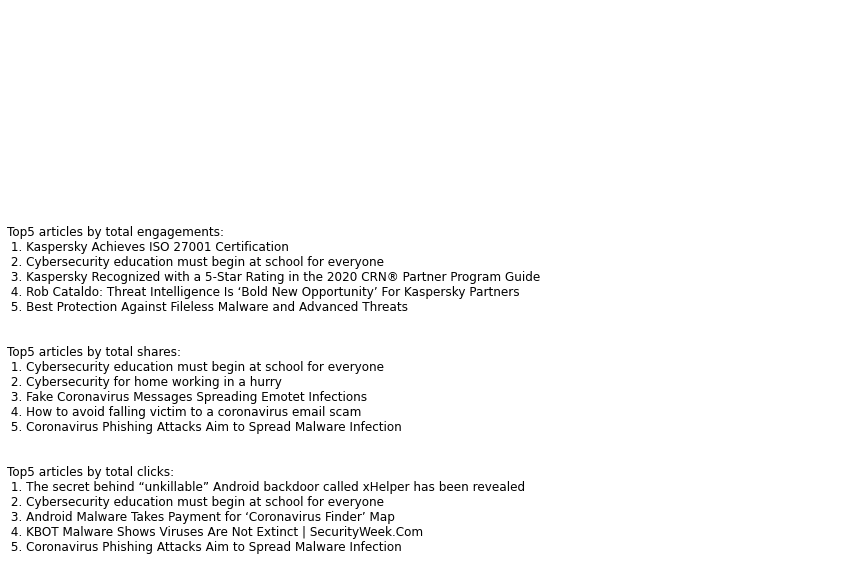

In [104]:
plt.text(0, 0, top_eng_string, fontsize=12)
plt.ylim(0, 10)
plt.axis('off')
plt.rcParams['figure.figsize'] = [1, 1]
plt.savefig('text.png')

In [105]:
for i in range(len(authors)-1):
    print(authors[i+1], df[df['suggested_by_name'] == authors[i+1]]['country index'].unique())

Darya Ladina ['RU']
Maria Losyukova ['RU']
Jorge Pena ['EN' 'LATAM' 'NA']
Igor Akhmetov ['EN' 'ME' 'UK']
Gustavo Cols ['LATAM' 'EN']
Sergey Lurye ['EN']
Norma Pacheco ['LATAM' 'EN']
Rainer Bock ['EN']
Ahmed Abdelghani ['ME' 'EN']
Zoe Tan ['EN' 'NA']
Amin Shokri ['EN' 'ME']
Rob Cataldo ['EN' 'NA']
Susi O'Neill ['EN']
Hernan Diazgranados ['LATAM']
Gayle Landry ['EN' 'NA']
Kristina Kiry ['EN']
Caroline Breure ['EN']
Tatyana ['RU']
